In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('home.price.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(df.drop('price',axis='columns'))  
X_scaled # I scaled my area and bedroom columns

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
y_scaled # I reshape it into 2D array

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
y_scaled.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [7]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1] # I pass here rows and columns | I have 2 features
   
    w = np.ones(shape = (number_of_features)) # I initialze my w1 and w2 as one and its shape are my features
    bias = 0
    total_samples = X.shape[0] 
    
    cost_list = [] # I save this as a two empty list to record cost
    epoch_list = [] # And to record epochs 
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + bias # w1 * area + w2 * bedrooms | transpose to convert rows into columns

        w_grad = -(2/total_samples) * (X.T.dot(y_true - y_predicted)) # Here from pattern it will help me find my w gradient
        b_grad = -(2/total_samples) * np.sum(y_true - y_predicted) # It will help me find bias gradient
        
        w = w - learning_rate * w_grad # And here i calculate my w
        bias = bias - learning_rate * b_grad # And my bias 
        
        cost = np.mean(np.square(y_true - y_predicted)) # my cost will be mean sqared error
        
        if i%10 == 0: # It will gonna record progress for my plot function every tenth iteration
            cost_list.append(cost) # It will be filling my lists
            epoch_list.append(i) # i its my epoch variable 
        
    return w, bias, cost, cost_list, epoch_list

w, bias, cost, cost_list, epoch_list = batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],),500)
w, bias, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

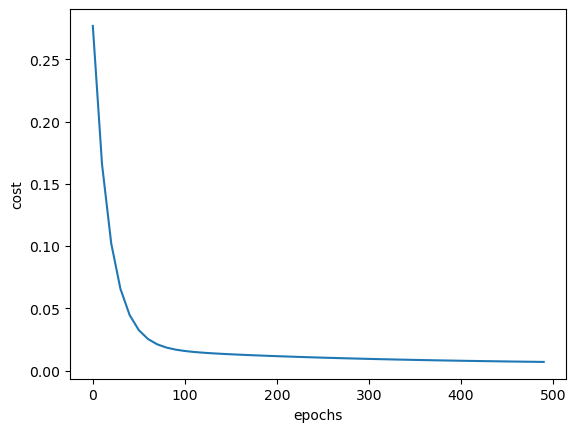

In [8]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list) # Here i plot how my cost reduces with every epoch

In [9]:
sy.inverse_transform([[1, 0.5, 0]]) # It return max value | mean value | min value

array([[167. ,  99.5,  32. ]])

In [10]:
def predict(area, bedrooms, w, bias): # Here is my prediction function
  X_scaled = sx.transform([[area, bedrooms]])[0] # There are my scaled features and I supply [0] to get 1D array instead of 2D

  scaled_price = w[0] * X_scaled[0] + w[1] * X_scaled[1] + bias # Its w1 * area + w2 * bedrooms + bias
  return sy.inverse_transform([[scaled_price]])[0][0] # I use index of "[0][0]" to get single value, instead i will get 2d array, so i use inverse_transform method to get actual price 

predict(2600, 4, w, bias) # I also supply my price into [0][0] which return me single value 

c:\Users\pulow\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [11]:
predict(1020, 2, w, bias)

c:\Users\pulow\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.911451888469838

In [12]:
predict(1020, 3, w, bias)  

c:\Users\pulow\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


53.67802963248741

In [15]:
import random

In [16]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1] # There are my features area and bedroom
    w = np.ones(shape = (number_of_features)) 
    bias = 0
    total_samples = X.shape[0] # My values in columns 
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0, total_samples - 1) # It will pick random samples between 0 and total_samples | indexes are len -1 
        sample_x = X[random_index] # Here it pick random sample X
        sample_y = y_true[random_index] # And here pick random sample y
        
        y_predicted = np.dot(w, sample_x.T) + bias
    
        w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples) * (sample_y - y_predicted)
        
        w = w - learning_rate * w_grad
        bias = bias - learning_rate * b_grad
        
        cost = np.square(sample_y - y_predicted)
        
        if i%100 == 0: # It gonna record cost and and epoch every 100th iteration
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, bias, cost, cost_list, epoch_list

w_sgd, bias_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],),10000)
w_sgd, bias_sgd, cost_sgd # For SGD i need to run more epochs 
    

(array([0.70529852, 0.67350532]), -0.228607091334512, 0.0025395787557507595)

In [17]:
w, bias, cost # Its the same 

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

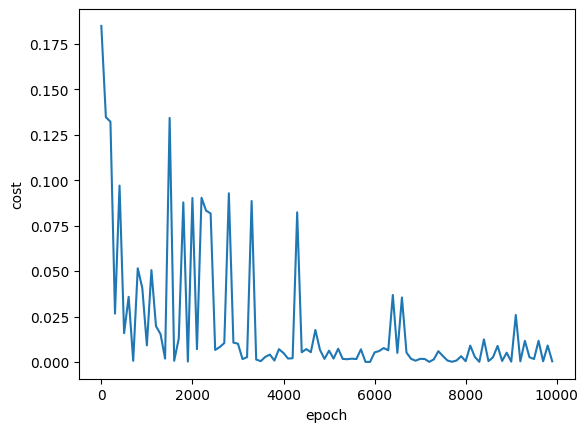

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [ ]:
predict(2600, 4, w_sgd, bias_sgd)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.1821572746711

In [ ]:
predict(1500, 3, w_sgd, bias_sgd)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.23630730311856

In [18]:
predict(1500, 4, w_sgd, bias_sgd)

c:\Users\pulow\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


92.31345982838917